In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

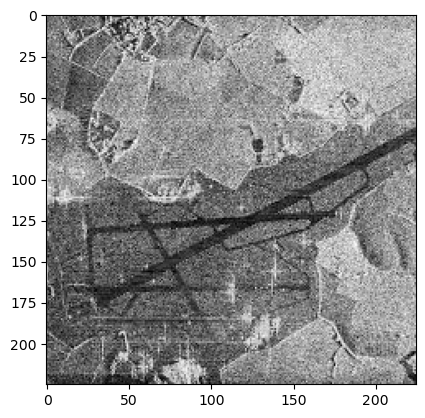

In [3]:
plt.imshow(image_gray, cmap="gray")

# Нахождение наиболее протяженного участка дороги на картинке

In [4]:
canny = cv2.Canny(image_gray,150,600,apertureSize = 3)

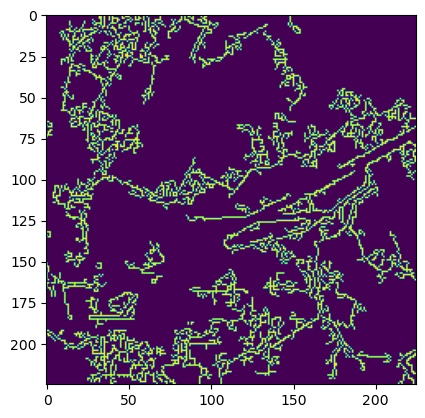

In [5]:
plt.imshow(canny)

In [6]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 100)

In [7]:
print(lines)

[[[172.          1.0821041]]]


In [8]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

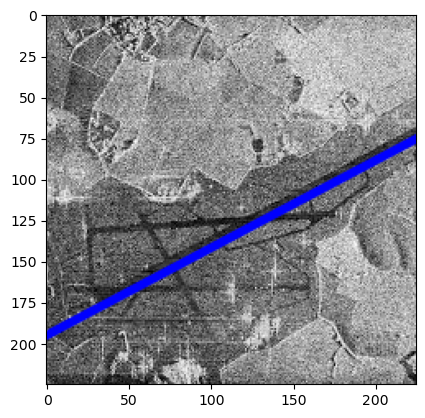

In [9]:
plt.imshow(image)

# Применение различных способов бинаризации

## Точечная бинаризация

In [10]:
_,th1 = cv2.threshold(image_gray,100,255,cv2.THRESH_BINARY)

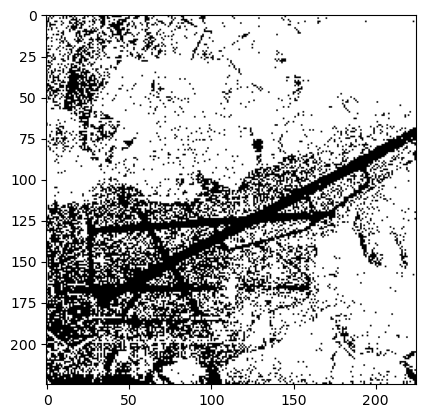

In [12]:
plt.imshow(th1, cmap="gray")

## Бинаризация Отсу

In [13]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_OTSU)

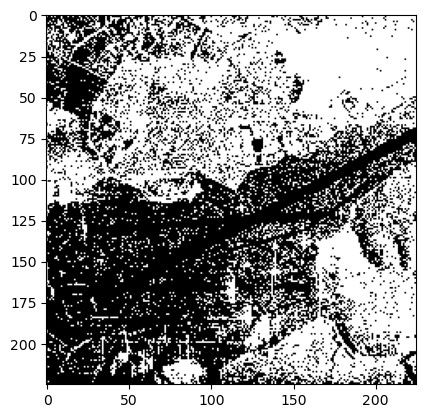

In [14]:
plt.imshow(th2, cmap="gray")

## Адаптивная бинаризация

In [15]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,151,21)

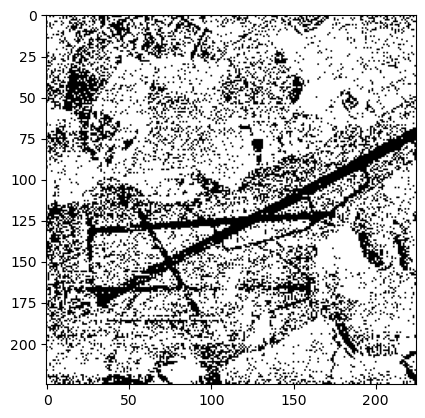

In [16]:
plt.imshow(th3, cmap="gray")